## Illustrating kernels in libpysal

This is for discussion of [https://github.com/pysal/libpysal/pull/791](https://github.com/pysal/libpysal/pull/791).


Here we are trying to move basic kernel functionality upstream in lib so that it can be consumed elsehere (graph, other future modules?). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import libpysal.kernels as kernels

sns.set(style="whitegrid")

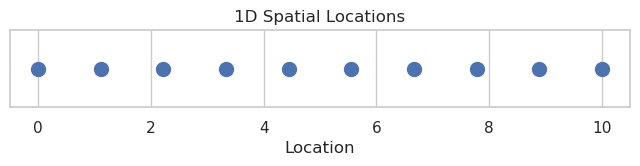

In [2]:
x = np.linspace(0, 10, 10)
locations = x.reshape(-1, 1)  # shape (10, 1)

plt.figure(figsize=(8, 1))
plt.plot(x, np.zeros_like(x), 'o', markersize=10)
plt.title("1D Spatial Locations")
plt.yticks([])
plt.xlabel("Location")
plt.show()

In [3]:
# Compute Pairwise Distance Matrix

from scipy.spatial.distance import cdist

D = cdist(locations, locations, metric='euclidean')

print("Distance matrix shape:", D.shape)

Distance matrix shape: (10, 10)


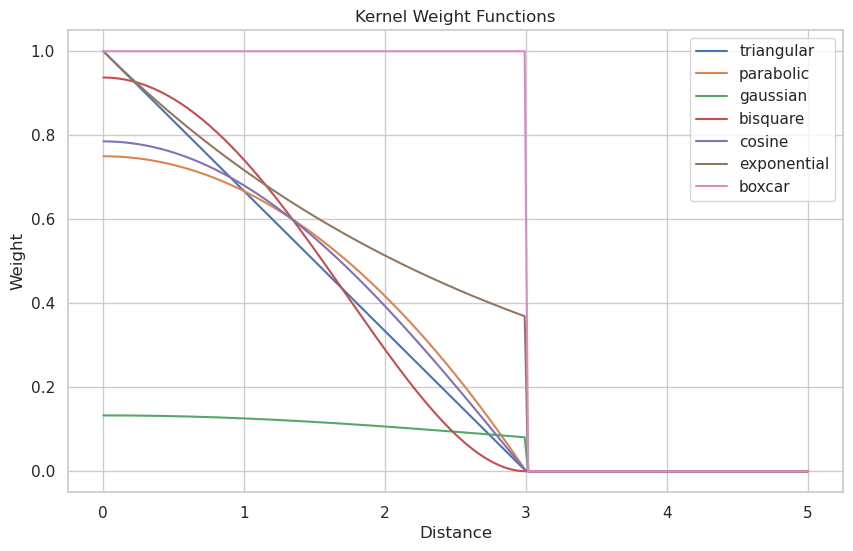

In [4]:
#  Kernel Weights

bandwidth = 3.0
kernel_names = ["triangular", "parabolic", "gaussian", "bisquare", "cosine", "exponential", "boxcar"]

# Create a plot of weight curves for each kernel
d_vals = np.linspace(0, 5, 200)

plt.figure(figsize=(10, 6))
for name in kernel_names:
    w = kernels.kernel(d_vals, bandwidth, kernel=name)
    plt.plot(d_vals, w, label=name)

plt.title("Kernel Weight Functions")
plt.xlabel("Distance")
plt.ylabel("Weight")
plt.legend()
plt.grid(True)
plt.show()

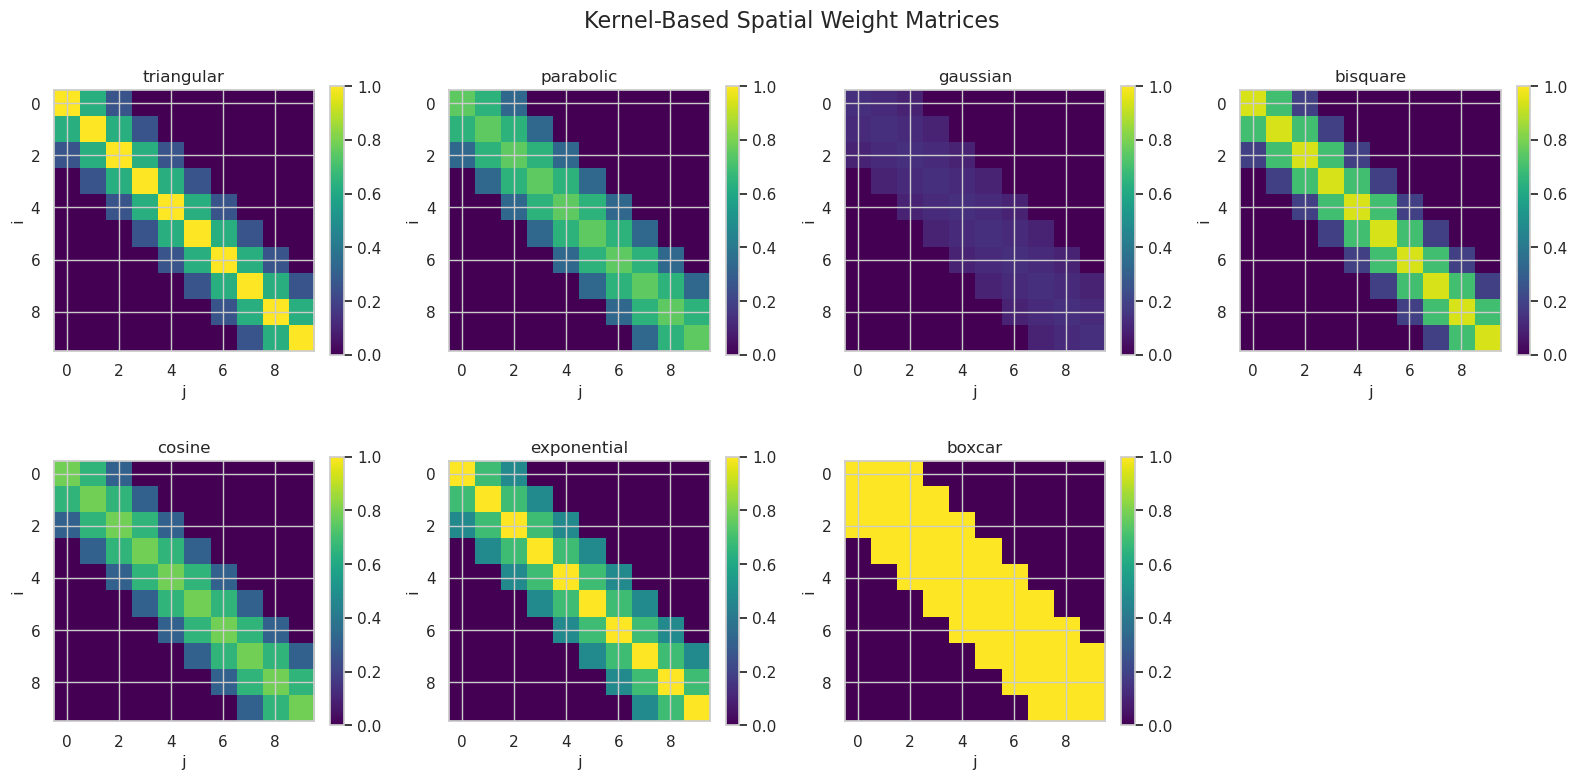

In [6]:
# Visualize Weight Matrix for Each Kernel

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, name in enumerate(kernel_names):
    W = kernels.kernel(D, bandwidth, kernel=name)
    ax = axes[i]
    im = ax.imshow(W, cmap="viridis", vmin=0, vmax=1)
    ax.set_title(name)
    ax.set_xlabel("j")
    ax.set_ylabel("i")
    fig.colorbar(im, ax=ax, shrink=0.8)

for j in range(i+1, len(axes)):
    axes[j].axis('off')

fig.suptitle("Kernel-Based Spatial Weight Matrices", fontsize=16)
plt.tight_layout()
plt.show()

